# Dekompozycja sezonowa

Dekompozycja sezonowa zakłada, że szereg czasowy składa się z 4 składników:
 - składnika sezonowego (S)
 - składnika trendu (T)
 - składnika cyklicznego (C)
 - składnika losowego błędu (I)

Róznica między składnikiem cyklicznym i sezonowym polega na tym,że składnik sezonowy pojawia się w regularnych odstępach, z kolei cykle charakteryzują się dłuższym czasem trwania oraz zmiennością czasu trwania cyklu. Zależność funkcyjna między trendem a cyklicznością mogą zostać przedstawione za pomocą dwóch modelów.


Import potrzebnych bibliotek:
- numpy - operacje numeryczne
- pandas - obsługa danych
- matplotlib - wykresy
- statsmodels - dostarcza metdoy seasonal_decompose() - do dekompozycji sezonowej

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = [15, 10]

Import danych:

Dane przedstawiają ilość pasażerów lini lotniczych na przestrzeni miesięcy lat 1949-1960

         #Passengers
Month               
1949-01          112
1949-02          118
1949-03          132
1949-04          129
1949-05          121
...              ...
1960-08          606
1960-09          508
1960-10          461
1960-11          390
1960-12          432

[144 rows x 1 columns]


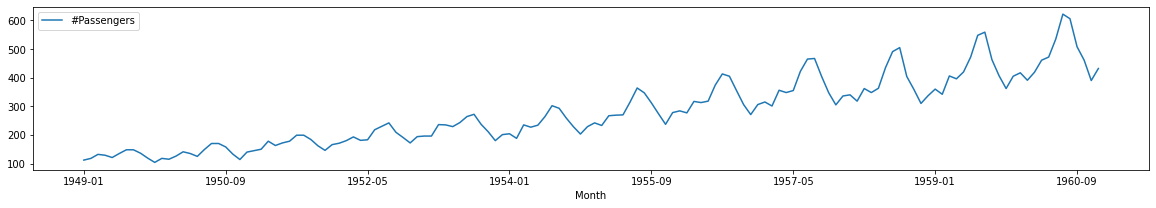

In [103]:
data = pd.read_csv("data/AirPassengers.csv", header=0, index_col=0)
print(data)
data.plot(figsize=(20,3))


Jeszcze przed dekompozycją można zauważyć, że liczba pasażerów wykazuje pewien trend (wzrostowy) oraz sezonowość.

In [105]:
def showData(data, model):
    dataCopy = pd.read_csv("data/AirPassengers.csv", header=0, index_col=0)
    dataCopy['observed'] = model.observed
    dataCopy['residual'] = model.resid
    dataCopy['seasonal'] = model.seasonal
    dataCopy['trend'] = model.trend
    dataCopy.plot(figsize=(20,3))

# Model addytywny

Y = S + T + C + I

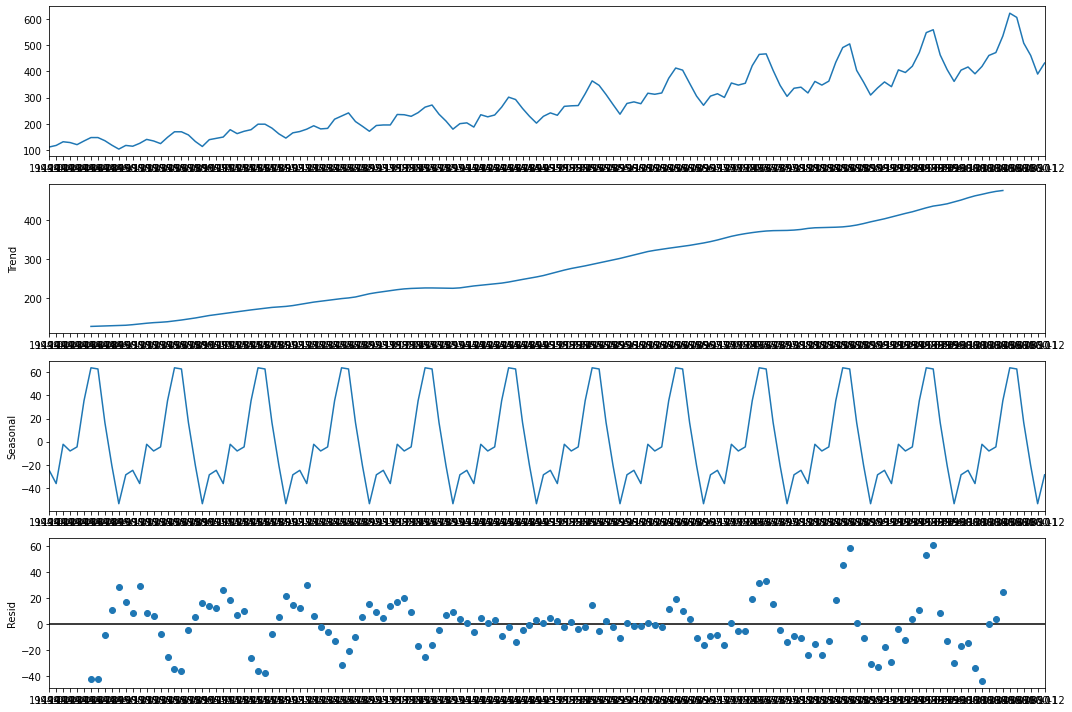

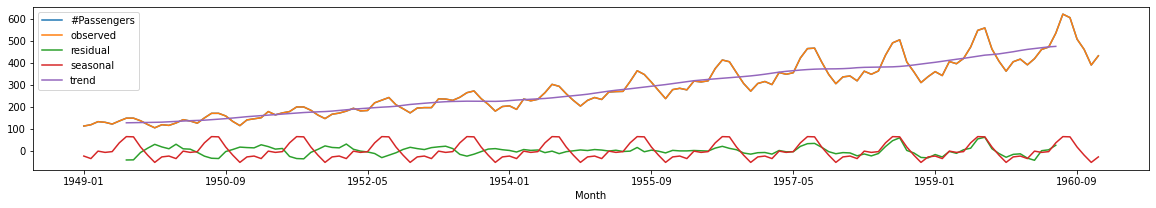

In [110]:
additiveModel = seasonal_decompose(data, model='additive', period=12)
additiveModel.plot()
plt.show()
showData(data, additiveModel)

# Model multiplikatywny

In [ ]:
Y = S * T * C * I

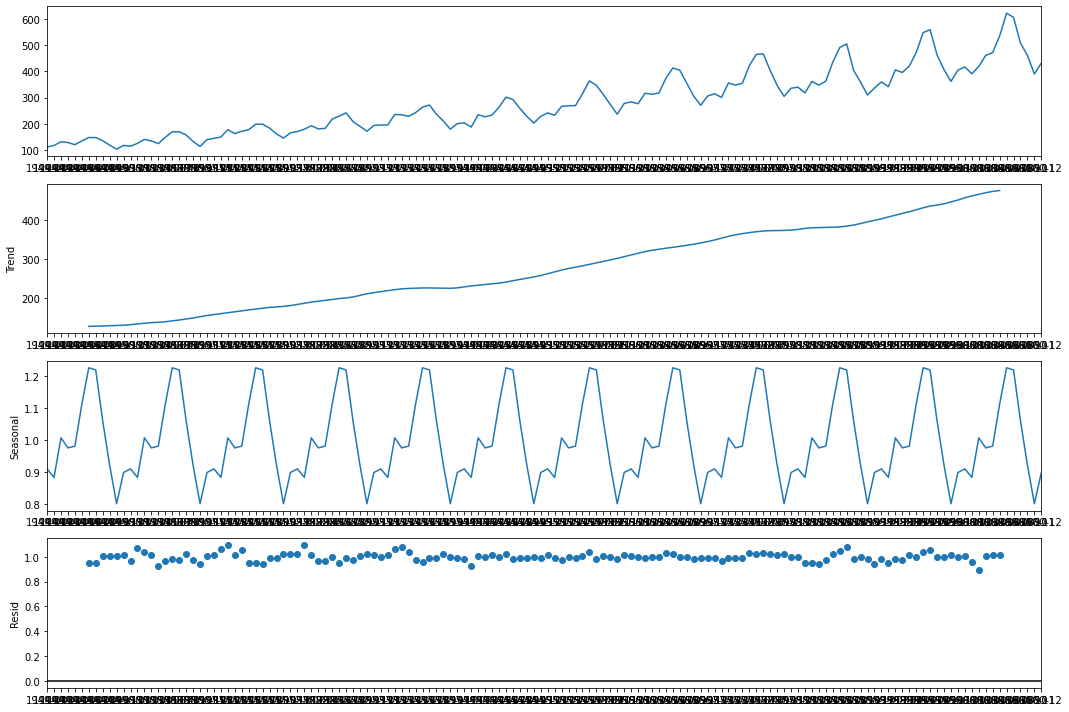

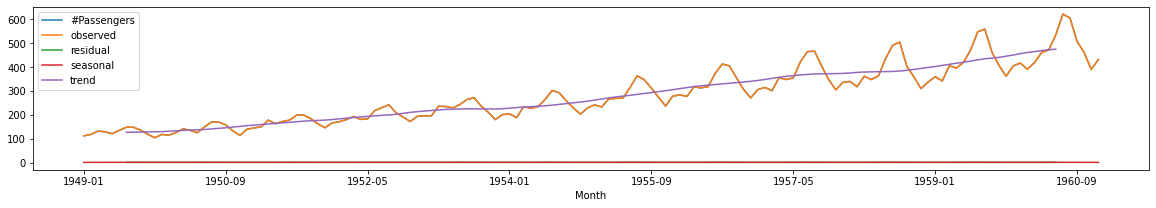

In [107]:
multiplicativeModel = seasonal_decompose(data, model='multiplicative', period=12)
multiplicativeModel.plot()
plt.show()
showData(data, multiplicativeModel)